In [23]:
import numpy as np
from math import comb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [24]:
n = 12
r = 2
combinatoria = np.math.comb(n, r)

print(combinatoria)

66


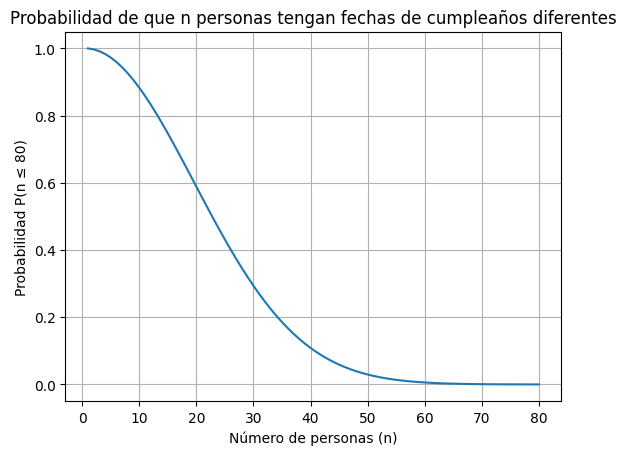

In [25]:
def calcular_probabilidad_cumpleaños(n):
    probabilidad = 1.0
    for i in range(1, n+1):
        probabilidad *= (365-i+1)/365
    return probabilidad

x = range(1, 81)
y = [calcular_probabilidad_cumpleaños(n) for n in x]

plt.plot(x, y)
plt.xlabel('Número de personas (n)')
plt.ylabel('Probabilidad P(n ≤ 80)')
plt.title('Probabilidad de que n personas tengan fechas de cumpleaños diferentes')
plt.grid(True)
plt.show()

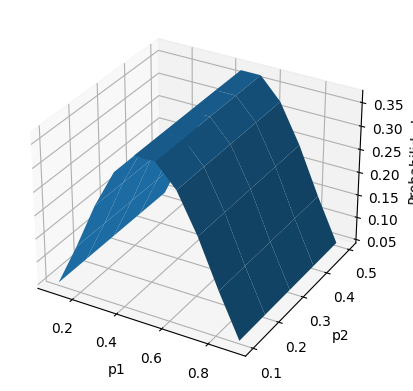

Punto con probabilidad mínima:
p1 = [0.9 0.9 0.9 0.9 0.9], p2 = [0.1 0.2 0.3 0.4 0.5], probabilidad = 0.04859999999999998
Punto con probabilidad máxima:
p1 = [0.45555556 0.45555556 0.45555556 0.45555556 0.45555556], p2 = [0.1 0.2 0.3 0.4 0.5], probabilidad = 0.3690974851394605


In [26]:
p1_rango = np.linspace(0.1, 0.9, 10)
p2_rango = np.linspace(0.1, 0.5, 5)

p1_values, p2_values = np.meshgrid(p1_rango, p2_rango)
prob_values = np.zeros_like(p1_values)

for i in range(len(p1_rango)):
    for j in range(len(p2_rango)):
        p1 = p1_rango[i]
        p2 = p2_rango[j]
        prob = 6 * p1**2 * (1 - p1)**2
        prob_values[j, i] = prob

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p1_values, p2_values, prob_values)

ax.set_xlabel('p1')
ax.set_ylabel('p2')
ax.set_zlabel('Probabilidad')

plt.show()

min_prob = np.min(prob_values)
max_prob = np.max(prob_values)
min_index = np.where(prob_values == min_prob)
max_index = np.where(prob_values == max_prob)

min_p1 = p1_values[min_index]
min_p2 = p2_values[min_index]
max_p1 = p1_values[max_index]
max_p2 = p2_values[max_index]

print("Punto con probabilidad mínima:")
print(f"p1 = {min_p1}, p2 = {min_p2}, probabilidad = {min_prob}")
print("Punto con probabilidad máxima:")
print(f"p1 = {max_p1}, p2 = {max_p2}, probabilidad = {max_prob}")

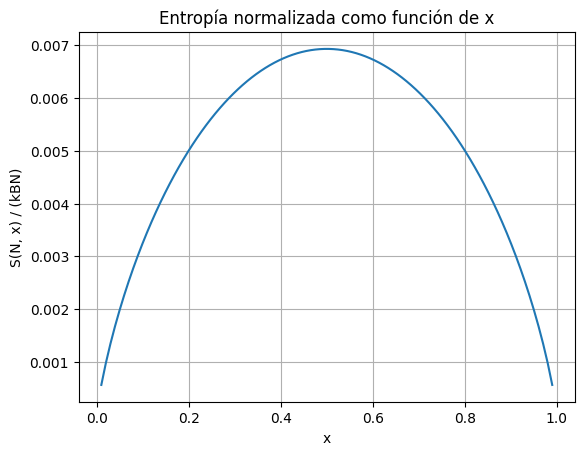

In [27]:
def entropia(N, x):
    return -x * np.log(x) - (1 - x) * np.log(1 - x)

N = 100
kB = 1.0

valores_x = np.linspace(0.01, 0.99, 100)

valores_entropia = entropia(N, valores_x) / (kB * N)

plt.plot(valores_x, valores_entropia)
plt.xlabel('x')
plt.ylabel('S(N, x) / (kBN)')
plt.title('Entropía normalizada como función de x')
plt.grid(True)
plt.show()


In [1]:
## Distribuciones continuas de probabilidad. Punto 1

In [28]:
import sympy as sp

x, y = sp.symbols('x y')

f = 2/3 * (x + 2*y)

non_negativity = sp.integrate(f, (x, 0, 1), (y, 0, 1))
non_negativity_condition = non_negativity >= 0

integration = sp.integrate(f, (x, 0, 1), (y, 0, 1))
integration_condition = sp.simplify(integration) == 1

print("No negatividad:", non_negativity_condition)
print("Integración unitaria:", integration_condition)

No negatividad: True
Integración unitaria: True


In [29]:
g = sp.integrate(f, (y, 0, 1))

h = sp.integrate(f, (x, 0, 1))

print("Distribución marginal g(x):", g)
print("Distribución marginal h(y):", h)

Distribución marginal g(x): 0.666666666666667*x + 0.666666666666667
Distribución marginal h(y): 1.33333333333333*y + 0.333333333333333


In [30]:
E_x = sp.integrate(x * f, (x, 0, 1), (y, 0, 1))

print("(E(X)):", E_x)

(E(X)): 0.555555555555556


In [31]:
E_y = sp.integrate(y * f, (x, 0, 1), (y, 0, 1))

print("(E(Y)):", E_y)

(E(Y)): 0.611111111111111


In [32]:
E_xy = sp.integrate(x * y * f, (x, 0, 1), (y, 0, 1))
cov_xy = E_xy - E_x * E_y


print("σxy:", cov_xy)

σxy: -0.00617283950617281


In [33]:
E_xy = sp.integrate((x - E_x) * (y - E_y) * f, (x, 0, 1), (y, 0, 1))

print("σxy:", E_xy)

σxy: -0.00617283950617284


In [34]:
independence = sp.simplify(f - g * h) == 0

if independence:
    print("X e Y son independientes.")
else:
    print("X e Y no son independientes.")

X e Y no son independientes.


In [ ]:
#Distribuciones continuas. Punto 4

In [35]:
import numpy as np
from sympy import symbols, exp, integrate

# Definir la variable simbólica
x = symbols('x')


f_x = exp(-x)

# Definir la función g(X)
g_x = exp(2*x/ 3)

print(g_x*f_x)

# Calcular el valor esperado utilizando la integral
expected_value = integrate(g_x*f_x, (x, 0, np.inf))

# Mostrar el resultado
print("El valor esperado de g(X) es:", expected_value)

exp(-x/3)
El valor esperado de g(X) es: 3
